In [1]:
#April_23rd_Online_shopping

Online shopping Customer Segmentation

**Problem statement**

-  1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 
-  2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count
-  3. Top 10 selling recommended product 
-  4  Best recommended product at country level.

Recommendation Engine:- 

-  1 Product Recommendation-Collaborative Filtering.
-  2 Movie Recommendation-Content-Based Filtering.

Recency, frequency, monetary value (RFM) is a model used in marketing 
analysis that segments a company’s consumer base by their purchasing 
patterns or habits. In particular, it evaluates customers’ recency 
(how long ago they made a purchase), frequency (how often they make purchases), 
and monetary value (how much money they spend).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
original_data=pd.read_excel("Online_shopping.xlsx")

In [4]:
df=original_data.copy()
df.head(100)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
95,536378,22352,lunch box with cutlery retrospot,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,pack of 72 retrospot cake cases,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,pack of 60 dinosaur cake cases,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,pack of 60 pink paisley cake cases,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [5]:
# Goal 1:- Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
#to solve the Goal 1 we dont required few columns

In [8]:
df1=df.drop(["StockCode","Description","lower","Country"],axis=1)

In [9]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [10]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [11]:
# cust Id is the vital info , which can not be retrive or impute
# we have to drop rows, if missing 

In [12]:
df1.dropna(axis=0,inplace=True)

In [13]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [15]:
# QUANTITY NEG VALUE MEANS RETURN ITEM
# UNIT PRICE 0 means its free item.

In [16]:
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [17]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [18]:
df1=df1[df1["Quantity"]>0]

In [19]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
df1.head(100)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
95,536378,6,2010-12-01 09:37:00,2.55,14688.0
96,536378,120,2010-12-01 09:37:00,0.42,14688.0
97,536378,24,2010-12-01 09:37:00,0.55,14688.0
98,536378,24,2010-12-01 09:37:00,0.55,14688.0


In [21]:
# create a total column--- total=qty*unit price

In [22]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [23]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [24]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [25]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [26]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [27]:
# Recency -> calculate the last business date as per dataset
#Recency=last business date - last invoice date of the client

In [28]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [29]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [30]:
# set the last date as benchmark by adding +1 day extra

In [31]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [32]:
#Recency = latest date - last invoice date of specific customer
#Frequency= count of Invoice (how many time customer id appearing )
# Monetary= sum of total w.r.to customer ID

In [33]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [34]:
RFM_Score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [35]:
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [36]:
# rename the column name
RFM_Score=RFM_Score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [37]:
RFM_Score.head(100)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
95,12462.0,18,2,1189.59
96,12463.0,53,4,1344.78
97,12464.0,10,8,1212.05
98,12465.0,17,2,742.19


In [38]:
RFM_Score["Frequency"].max()

211

In [39]:
RFM=RFM_Score.copy()

In [40]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [41]:
RFM["R_rank"]=RFM["Recency"].rank(ascending=False)

In [42]:
RFM["F_rank"]=RFM["Frequency"].rank(ascending=True)
RFM["M_rank"]=RFM["Monetary"].rank(ascending=True)

In [43]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [44]:
# lets calculate percentage marks frequency

In [45]:
RFM["R_final"]=(RFM["R_rank"]/RFM["R_rank"].max())*100

In [46]:
RFM["F_final"]=(RFM["F_rank"]/RFM["F_rank"].max())*100
RFM["M_final"]=(RFM["M_rank"]/RFM["M_rank"].max())*100

In [47]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [48]:
RFM.drop(columns=["R_rank","F_rank","M_rank"],inplace=True)

In [49]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546


In [50]:
# lets create the final marks of RFM as per desired weigthage

In [51]:
RFM["RFM_SUM"]=0.15*RFM["R_final"]+0.30*RFM["F_final"]+0.60*RFM["M_final"]

In [52]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579,65.600850
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327,95.440824
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981,72.751121
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671,62.015870
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546,22.959420


In [53]:
RFM["RFM_SUM"].max()

104.9170315740954

In [54]:
RFM["RFM_SUM"].min()

5.363923372266154

In [55]:
RFM=RFM.round(2)

In [56]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96


In [57]:
# lets do the customer segmentation using Quantile approach

In [58]:
quant=RFM["RFM_SUM"].quantile(q=[0.25,0.50,0.75])

In [59]:
quant

0.25    28.365
0.50    51.290
0.75    75.885
Name: RFM_SUM, dtype: float64

In [60]:
# 4 groups- Silver,Gold,Diamond,Platinum

In [61]:
def loyality(x):
    if x<=28:
        return "Silver"
    elif x<=51:
        return "Gold"
    elif x<=76:
        return "Diamond"
    else:
        return "Platinum"

In [62]:
RFM["Loyality"]=RFM["RFM_SUM"].apply(loyality)

In [63]:
RFM.head(100)

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver
...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,74.26,44.03,66.47,64.23,Diamond
96,12463.0,53,4,1344.78,48.37,69.79,69.81,70.08,Diamond
97,12464.0,10,8,1212.05,83.64,88.22,66.88,79.14,Platinum
98,12465.0,17,2,742.19,75.72,44.03,53.24,56.51,Diamond


In [64]:
RFM["Loyality"].value_counts()

Diamond     1101
Gold        1098
Platinum    1080
Silver      1060
Name: Loyality, dtype: int64

In [65]:
# do make the segregation --- kmeans algorithm approach

In [66]:
NewData=RFM["RFM_SUM"]
NewData=pd.DataFrame(NewData)

In [67]:
NewData.head()

,RFM_SUM
0,65.60
1,95.44
2,72.75
3,62.02
4,22.96


In [68]:
from sklearn.cluster import KMeans

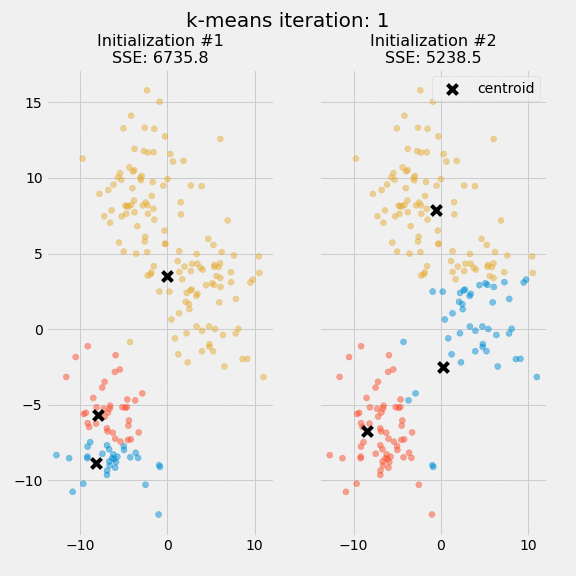

In [69]:
kmeans1=KMeans(n_clusters=4,max_iter=200,random_state=100)
y_means=kmeans1.fit_predict(NewData)
y_means

array([1, 2, 1, ..., 0, 2, 1])

In [70]:
RFM["CLUSTER"]=y_means

In [71]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,CLUSTER
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,1
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,2
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,1
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,1
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,3


In [72]:
RFM["CLUSTER10"]=kmeans1.labels_

In [73]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,CLUSTER,CLUSTER10
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,1,1
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,2,2
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,1,1
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,1,1
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,3,3


In [74]:
RFM["CLUSTER"].value_counts()

3    1253
0    1104
1    1040
2     942
Name: CLUSTER, dtype: int64

In [75]:
RFM["Loyality"].value_counts()

Diamond     1101
Gold        1098
Platinum    1080
Silver      1060
Name: Loyality, dtype: int64

In [76]:
# yellow bricks to find best value of k

from yellowbrick.cluster import KElbowVisualizer
model=kmeans1
visualizer=KElbowVisualizer(model,k=(1,10)).fit(NewData)
visualizer.show()

In [ ]:
# evaluation of clustering 


In [78]:
from sklearn.metrics import silhouette_score

In [79]:
labels=kmeans1.labels_
print(silhouette_score(NewData,labels))

0.5649889210598037


In [80]:
# GOAL2 --- Analysing the sales Trend w.r.to Timing, season, day, month..

In [81]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [82]:
df_final1=df_final.copy()

In [83]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [84]:
# df[invoicedate]=pd.to_datetime(df[invoicedate])--- if it was in object data type

In [85]:
# how to extract year, month,day,date,time,hr from datetime data type

In [86]:
import datetime as dt

In [87]:
df_final1["Day"]=df_final1["InvoiceDate"].dt.day_name()

In [88]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday


In [89]:
df_final1["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [90]:
df_final1["Date"]=df_final1["InvoiceDate"].dt.day

In [91]:
df_final1["Month"]=df_final1["InvoiceDate"].dt.month

In [92]:
df_final1["Month_name"]=df_final1["InvoiceDate"].dt.month_name()

In [93]:
df_final1["Hour"]=df_final1["InvoiceDate"].dt.hour

In [94]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Date,Month,Month_name,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,1,12,December,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,1,12,December,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,1,12,December,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,1,12,December,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,1,12,December,8


In [95]:
#df_final1["Hour"].value_counts()

In [96]:
#df_final1["Date"].value_counts()

In [97]:
# function to create season and timing

In [98]:
def cal_season(x):
    if x in[10,11,12,1]:
        return "Winter"
    if x in [2,3]:
        return "Spring"
    if x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [99]:
def cal_timing(x):
    if x in [3,4,5,6,7]:
        return "Early Morning"
    if x in [8,9,10,11]:
        return "Morning"
    if x in [12,13,14,15,16,17]:
        return "Afternoon"
    else:
        return "Evening"

In [100]:
df_final1["Season"]=df_final1["Month"].apply(cal_season)

In [101]:
df_final1["Timing"]=df_final1["Hour"].apply(cal_timing)

In [102]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Date,Month,Month_name,Hour,Season,Timing
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,1,12,December,8,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,1,12,December,8,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,1,12,December,8,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,1,12,December,8,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,1,12,December,8,Winter,Morning


In [103]:
# assignment - create a column for weekend or not

In [104]:
# analysing the business trend as per Day-- monday, Tuesday...etc

In [105]:
day_counting=df_final1.groupby("Day")["InvoiceNo"].count().reset_index()

In [106]:
day_counting

,Day,InvoiceNo
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


In [107]:
# assignment --- please create the pie chart

plt.figure(figsize=(10,5))
day=df_final1["Day"].value_counts()
sns.barplot(day.index,day.values)

plt.axhline(y=day.mean())

In [109]:
# assignment please plot graph for month, season,timing

# 10 Most Selling recommended Product

In [110]:
df3=original_data.copy()

In [111]:
df3.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [112]:
df3["Total"]=df3["Quantity"]*df3["UnitPrice"]

In [113]:
df3=df3.drop(["UnitPrice"],axis=1)

In [114]:
df3.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,CustomerID,Country,Total
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,17850.0,United Kingdom,20.34


In [115]:
df3.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
CustomerID     135080
Country             0
Total               0
dtype: int64

In [116]:
# finding the overall sale of product using pivot table

In [117]:
df3_table=df3.pivot_table(values="Total",index=["StockCode"],aggfunc="sum",sort=True).reset_index()

In [118]:
df4_table=df3.pivot_table(values=["Total","Quantity"],index=["StockCode"],aggfunc="sum",sort=True).reset_index()

In [119]:
df3_table

,StockCode,Total
0,10002,759.89
1,10080,119.09
2,10120,40.53
3,10125,994.84
4,10133,1540.02
...,...,...
4065,gift_0001_20,167.05
4066,gift_0001_30,175.53
4067,gift_0001_40,100.70
4068,gift_0001_50,167.56


In [120]:
df4_table

,StockCode,Quantity,Total
0,10002,1037,759.89
1,10080,495,119.09
2,10120,193,40.53
3,10125,1296,994.84
4,10133,2775,1540.02
...,...,...,...
4065,gift_0001_20,20,167.05
4066,gift_0001_30,37,175.53
4067,gift_0001_40,3,100.70
4068,gift_0001_50,4,167.56


In [121]:
df3_table[df3_table["Total"]==df3_table["Total"].max(axis=0)]

,StockCode,Total
4059,DOT,206245.48


In [122]:
df4_table[df4_table["Quantity"]==df4_table["Quantity"].max(axis=0)]

,StockCode,Quantity,Total
1070,22197,56450,50987.47


In [123]:
# assignment please find in decending order to find the top 5-10 selling products 

# Most Selling recommended product - Country level

In [124]:
df5_table=df3.pivot_table(values="Total",index=["Country","Description"],aggfunc="sum",sort=False).reset_index()

In [125]:
df5_table

,Country,Description,Total
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43
...,...,...,...
20171,Belgium,HAND WARMER RED RETROSPOT,25.20
20172,Belgium,HAND WARMER OWL DESIGN,25.20
20173,Belgium,HANGING JAM JAR T-LIGHT HOLDERS,10.20
20174,Germany,HAND WARMER UNION JACK,25.20


In [126]:
df5_table_new=df5_table.drop(["Description"],axis=1)
df5_table_new.head(2)

,Country,Total
0,United Kingdom,93953.07
1,United Kingdom,7684.25


In [127]:
df_country=df5_table_new.groupby(by="Country").max().reset_index()

In [128]:
df_country

,Country,Total
0,Australia,3375.84
1,Austria,1456.00
2,Bahrain,120.00
3,Belgium,4248.00
4,Brazil,175.20
5,Canada,550.94
6,Channel Islands,517.80
7,Cyprus,580.00
8,Czech Republic,70.80
9,Denmark,734.40


In [129]:
df_country["Primary"]=df_country["Country"]+" "+ (df_country["Total"].map(str))

In [130]:
df_country.head()

,Country,Total,Primary
0,Australia,3375.84,Australia 3375.84
1,Austria,1456.00,Austria 1456.0
2,Bahrain,120.00,Bahrain 120.0
3,Belgium,4248.00,Belgium 4248.0
4,Brazil,175.20,Brazil 175.2


In [131]:
# creating a same column in df 5

In [132]:
df5_table["Primary"]=df5_table["Country"]+" "+ (df5_table["Total"].map(str))

In [133]:
df5_table

,Country,Description,Total,Primary
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07,United Kingdom 93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25,United Kingdom 7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17,United Kingdom 5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79,United Kingdom 15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43,United Kingdom 21013.43
...,...,...,...,...
20171,Belgium,HAND WARMER RED RETROSPOT,25.20,Belgium 25.200000000000003
20172,Belgium,HAND WARMER OWL DESIGN,25.20,Belgium 25.200000000000003
20173,Belgium,HANGING JAM JAR T-LIGHT HOLDERS,10.20,Belgium 10.2
20174,Germany,HAND WARMER UNION JACK,25.20,Germany 25.200000000000003


In [134]:
df_merg=df_country.merge(df5_table,how="left",on="Primary")

In [135]:
df_merg.head()

,Country_x,Total_x,Primary,Country_y,Description,Total_y
0,Australia,3375.84,Australia 3375.84,Australia,RABBIT NIGHT LIGHT,3375.84
1,Austria,1456.00,Austria 1456.0,Austria,POSTAGE,1456.00
2,Bahrain,120.00,Bahrain 120.0,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00
3,Belgium,4248.00,Belgium 4248.0,Belgium,POSTAGE,4248.00
4,Brazil,175.20,Brazil 175.2,Brazil,REGENCY CAKESTAND 3 TIER,175.20


# Recommendation Engine

The global market for the usage of Recommendation Engine was valued at USD 2.69 
billion in 2021. It is anticipated to surpass USD 15.10 billion by 2026, 
reporting a CAGR of 37.79% during 2022-2026.


The recommendations that companies give you sometimes use data analysis 
techniques to identify items that match your taste and preferences. 

What is a Recommendation Engine?
A recommendation engine is a data filtering system that operates on different 
machine learning algorithms to recommend products, services, and information to 
users based on data analysis. It works on the principle of finding patterns in 
customer behavior data employing a variety of factors such as customer preferences, 
past transaction history, attributes, or situational context.

Different Techniques of Recommendation Engines
There are three different types of recommender engines known in 
machine learning, and they are:

1. Collaborative Filtering

The collaborative filtering method collects and analyzes data on user 
behavior, online activities, and preferences to predict what they will 
like based on the similarity with other users. It uses a matrix-style 
formula to plot and calculates these similarities.

Advantage

One significant advantage of collaborative filtering is that 
it doesn’t need to analyze or understand the object (products, films, books) 
to recommend complex items precisely. There is no dependence on analyzable 
machine content, which means it chooses recommendations based on what it knows about the user.

Example

If user X likes Book A, Book B, and Book C while user Y likes Book A, 
Book B, and Book D, they have similar interests. So, it is favorably 
possible that user X would select Book D and user Y would enjoy reading Bood C. 
This is how collaborative filtering happens.

2. Content-Based Filtering

Content-based filtering works on the principle of describing a product 
and a profile of the user’s desired choices. It assumes that you will 
also like this other item if you like a particular item. Products are 
defined using keywords (genre, product type, color, word length) to make 
recommendations. A user profile is created to describe the kind of item 
this user enjoys. Then the algorithm evaluates the similarity of items 
using cosine and Euclidean distances.

Advantage

One significant advantage of this recommender engine technique is that it 
does not need any additional data about other users since the recommendations 
are specific to this user. Also, this model can capture the particular 
interests of a user and suggest niche objects that very few other users are interested in.

Example

Suppose a user X likes to watch action movies like Spider-man. In that case, 
this recommender engine technique only recommends movies of the action genre 
or films describing Tom Holland.

3. Hybrid Model

In hybrid recommendation systems, both the meta (collaborative) data and 
the transactional (content-based) data are used simultaneously to suggest 
a broader range of items to the users. In this technique, natural language 
processing tags can be allocated for each object (movie, song), and vector 
equations calculate the similarity. A collaborative filtering matrix can then 
suggest things to users, depending on their behaviors, actions, and intentions.

Advantages

This recommendation system is up-and-coming and is said to outperform both of 
the above methods in terms of accuracy.

Example

Netflix uses a hybrid recommendation engine. It makes recommendations by 
analyzing the user’s interests (collaborative) and recommending such 
shows/movies that share similar attributes with those rated highly by the user(content-based).

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
original_data=pd.read_excel("Online_shopping.xlsx")

# movie recommendation engine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#data=pd.read_csv("movies_dataset.csv")

In [138]:
df50=original_data.copy()

In [139]:
df50.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [140]:
df50.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [141]:
df50=df50.drop(["lower"],axis=1)

In [142]:
df50.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [143]:
df50.dropna(axis=0,inplace=True)

In [144]:
df50.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [145]:
df50.shape

(406829, 8)

In [ ]:
#step 1--create a pivot table ( customer id, stock code)
# step 2-- apply the cosine similarity function on pivot table-- it geberate the similarity index.
#step 3 - extract the item purchased by  any two customer(having highest similarity)
# we can recommend the differce of product.

In [148]:
custID_matrix=df50.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum",fill_value=0)

In [149]:
custID_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# apply the similarity function

In [150]:
from sklearn.metrics.pairwise import cosine_similarity

In [224]:
similarity100=cosine_similarity(custID_matrix)

In [225]:
similarity100

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.14887891, ..., 0.01192112, 0.07451023,
        0.10894226],
       [0.        , 0.14887891, 1.        , ..., 0.        , 0.17517012,
        0.11009593],
       ...,
       [0.        , 0.01192112, 0.        , ..., 1.        , 0.00377618,
        0.        ],
       [0.        , 0.07451023, 0.17517012, ..., 0.00377618, 1.        ,
        0.04444524],
       [0.        , 0.10894226, 0.11009593, ..., 0.        , 0.04444524,
        1.        ]])

In [226]:
similarity100.shape

(4372, 4372)

In [155]:
final=pd.DataFrame(similarity)

In [156]:
final

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
4369,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000
4370,0.0,0.074510,0.175170,0.065295,0.019385,0.017238,0.0,0.104890,0.050042,0.063930,...,0.0,0.0,0.032142,0.070999,0.000000,0.000000,0.098201,0.003776,1.000000,0.044445


In [ ]:
# Placing the customer Id at Rows and column in the above data frame

In [157]:
final["customerID"]=custID_matrix.index

In [158]:
final=final.set_index("customerID")

In [159]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
customerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.0,0.011921,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.0,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.0,0.014689,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.019385,0.000000


In [160]:
final.columns=custID_matrix.index

In [161]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
customerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.0,0.011921,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.0,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.0,0.014689,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.019385,0.000000


In [ ]:
# the above matrix is the degree of similarity between any two customers.

In [ ]:
# for example .. we have a reference customer 12350.0... we want to see the similar customer

In [166]:
final.loc[12350.0].sort_values(ascending=False)
# we can paas any cust ID to calcualte the similaritry with other customers

CustomerID
12350.0    1.000000
15180.0    0.337317
15422.0    0.336127
13455.0    0.228141
15435.0    0.214309
             ...   
16217.0   -0.000602
18270.0   -0.000618
16252.0   -0.047206
14304.0   -0.053090
17548.0   -0.054147
Name: 12350.0, Length: 4372, dtype: float64

In [ ]:
# Customer A---> 12350.0, customer B--->15180.0

In [168]:
item_cust_A=set(custID_matrix.loc[12350.0].iloc[custID_matrix.loc[12350.0].to_numpy().nonzero()].index)

In [169]:
item_cust_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [170]:
item_cust_B=set(custID_matrix.loc[15180.0].iloc[custID_matrix.loc[15180.0].to_numpy().nonzero()].index)

In [171]:
item_cust_B

{22112, 22113, 22114, 22348, 22835, 72741}

In [172]:
item_cust_123460=set(custID_matrix.loc[12346.0].iloc[custID_matrix.loc[12346.0].to_numpy().nonzero()].index)

In [173]:
item_cust_123460

set()

In [174]:
Recommended_product_cust_A=item_cust_B-item_cust_A

In [175]:
Recommended_product_cust_A

{22112, 22113, 22114, 22835, 72741}

In [ ]:
# lets see the description of these recommended products

In [178]:
df50.loc[df50["StockCode"].isin(Recommended_product_cust_A),["StockCode","Description"]].drop_duplicates()

,StockCode,Description
82,22114,HOT WATER BOTTLE TEA AND SYMPATHY
311,22835,HOT WATER BOTTLE I AM SO POORLY
312,22112,CHOCOLATE HOT WATER BOTTLE
695,22113,GREY HEART HOT WATER BOTTLE
1378,72741,GRAND CHOCOLATECANDLE


# Movie Recommendation

In [ ]:
#movies_dataset.csv

In [227]:
movies=pd.read_csv("movies_dataset.csv")

In [228]:
movies_df=movies.copy()

In [229]:
movies_df.head()

,Unnamed: 0,movie_id,title,tags
0,0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [230]:
movies_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [231]:
movies_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [232]:
movies_df.isnull().sum()

movie_id    0
title       0
tags        0
dtype: int64

In [233]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   title     4806 non-null   object
 2   tags      4806 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.8+ KB


In [234]:
movies_df["tags"][4]

"John Carter is a war-weary, former military captain who's inexplicably transported to the mysterious and exotic planet of Barsoom (Mars) and reluctantly becomes embroiled in an epic conflict. It's a world on the brink of collapse, and Carter rediscovers his humanity when he realizes the survival of Barsoom and its people rests in his hands. Action Adventure ScienceFiction basedonnovel mars medallion spacetravel princess alien steampunk martian escape edgarriceburroughs alienrace superhumanstrength marscivilization swordandplanet 19thcentury 3d TaylorKitsch LynnCollins SamanthaMorton AndrewStanton"

In [235]:
movies_df["tags"][10]

'Superman returns to discover his 5-year absence has allowed Lex Luthor to walk free, and that those he was closest too felt abandoned and have moved on. Luthor plots his ultimate revenge that could see millions killed and change the face of the planet forever, as well as ridding himself of the Man of Steel. Adventure Fantasy Action ScienceFiction savingtheworld dccomics invulnerability sequel superhero basedoncomicbook kryptonite superpowers superhumanstrength lexluthor BrandonRouth KevinSpacey KateBosworth BryanSinger'

In [236]:
# create a Bag of words
# CountVectorizer---- it take the verb adverb also in the consideration , 
# TfidfVectorizer---- it only take the imprtant word

In [237]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [238]:
# TF-DF approach

In [239]:
tfidf=TfidfVectorizer()

In [240]:
overview_matrix=tfidf.fit_transform(movies_df["tags"])

In [241]:
overview_matrix

<4806x35831 sparse matrix of type '<class 'numpy.float64'>'
	with 261807 stored elements in Compressed Sparse Row format>

In [242]:
overview_matrix.shape

(4806, 35831)

In [243]:
count_array=overview_matrix.toarray()

In [244]:
count_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [245]:
overview_matrix=pd.DataFrame(data=count_array,columns=tfidf.get_feature_names_out())

In [246]:
overview_matrix

,00,000,007,07am,10,100,1000,101,108,10th,...,única,über,đỗthịhảiyến,špelacolja,γη,юлияснигирь,卧底肥妈,张立,绝地奶霸,超级妈妈
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
#apply the cosine similarity in count_array

In [248]:
from  sklearn.metrics.pairwise import cosine_similarity

In [249]:
similarity_matrix=pd.DataFrame(cosine_similarity(count_array))

In [250]:
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805
0,1.000000,0.028301,0.017183,0.024261,0.079641,0.039612,0.013027,0.065816,0.018059,0.018172,...,0.003616,0.006978,0.035071,0.034464,0.014465,0.015708,0.010677,0.020631,0.013451,0.007094
1,0.028301,1.000000,0.031347,0.021184,0.041685,0.049074,0.016521,0.063842,0.028338,0.033123,...,0.002105,0.015714,0.030164,0.034941,0.043802,0.023869,0.009761,0.028020,0.019850,0.011713
2,0.017183,0.031347,1.000000,0.022886,0.027405,0.028827,0.011407,0.077295,0.025291,0.021344,...,0.010343,0.003522,0.013062,0.013786,0.029785,0.030635,0.005201,0.029275,0.013353,0.012780
3,0.024261,0.021184,0.022886,1.000000,0.025754,0.029991,0.027739,0.067242,0.019851,0.151983,...,0.002605,0.012626,0.023483,0.025531,0.031535,0.032729,0.010949,0.045792,0.046781,0.026641
4,0.079641,0.041685,0.027405,0.025754,1.000000,0.028968,0.041728,0.084898,0.021634,0.036152,...,0.012671,0.017421,0.031181,0.027378,0.044481,0.037639,0.008840,0.033013,0.029701,0.019233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0.015708,0.023869,0.030635,0.032729,0.037639,0.014975,0.024614,0.060240,0.038213,0.022611,...,0.007588,0.021340,0.037669,0.019804,0.056922,1.000000,0.003609,0.021091,0.041227,0.026576
4802,0.010677,0.009761,0.005201,0.010949,0.008840,0.007257,0.008762,0.010744,0.003054,0.004524,...,0.000000,0.006534,0.010743,0.015006,0.008643,0.003609,1.000000,0.025532,0.016957,0.005606
4803,0.020631,0.028020,0.029275,0.045792,0.033013,0.029607,0.036127,0.035608,0.031252,0.025760,...,0.016584,0.018961,0.043485,0.038865,0.025103,0.021091,0.025532,1.000000,0.041835,0.030052
4804,0.013451,0.019850,0.013353,0.046781,0.029701,0.015934,0.029049,0.030346,0.037406,0.019673,...,0.002696,0.022759,0.031886,0.031459,0.037660,0.041227,0.016957,0.041835,1.000000,0.038382


In [251]:
similarity_matrix[5]

0       0.039612
1       0.049074
2       0.028827
3       0.029991
4       0.028968
          ...   
4801    0.014975
4802    0.007257
4803    0.029607
4804    0.015934
4805    0.009789
Name: 5, Length: 4806, dtype: float64

In [252]:
similarity_score=list(enumerate(similarity[5]))

In [253]:
similarity_score

[(0, 0.0),
 (1, 0.0348332267482791),
 (2, 0.0015781732401801765),
 (3, 0.13648782438235474),
 (4, 0.0019381801580646999),
 (5, 1.0),
 (6, 0.0),
 (7, 0.05345638735772705),
 (8, 0.0011973180076628352),
 (9, 0.048194300523816264),
 (10, 0.05574180383949068),
 (11, 0.10086218780594426),
 (12, 0.06471580293990428),
 (13, 0.024668234943497815),
 (14, 0.06900335674495683),
 (15, 0.07502517456496531),
 (16, 0.0),
 (17, 0.006113474004682708),
 (18, 0.0017076532610079665),
 (19, 0.02941428653178438),
 (20, 0.0195099770052763),
 (21, 0.013268247626817373),
 (22, 0.05739568247432855),
 (23, 0.0016513473357069176),
 (24, 0.006229250471128458),
 (25, 0.0033500679264351746),
 (26, 0.05020916068195133),
 (27, 0.015441207313332369),
 (28, 0.0062910412876291365),
 (29, 0.05198871214560633),
 (30, 0.14122708093364592),
 (31, 0.015344047967374486),
 (32, 0.033415434542755494),
 (33, 0.0),
 (34, 0.025656703612755585),
 (35, 0.005690366512689426),
 (36, 0.004742839440367799),
 (37, 0.029246775097830777),
 (

In [254]:
similarity_score=sorted(enumerate(similarity[5]),key=lambda x:x[1],reverse=True)

In [255]:
similarity_score

[(5, 1.0),
 (266, 0.28637345637013),
 (350, 0.2605834692364864),
 (1079, 0.25252890939200834),
 (3033, 0.2389035596646727),
 (3518, 0.22050387530096244),
 (307, 0.2146738536257154),
 (940, 0.21438196416709138),
 (1423, 0.20267598842415008),
 (100, 0.1920417196236607),
 (1439, 0.18583964308471537),
 (269, 0.18415674891392186),
 (2764, 0.18398789140741345),
 (79, 0.1816433021780876),
 (179, 0.17941243221350128),
 (274, 0.17720995563609432),
 (1303, 0.17680238432251727),
 (3541, 0.17540074417106266),
 (1883, 0.1739530635173782),
 (1067, 0.17371477337571917),
 (4033, 0.16985292289505216),
 (1813, 0.16945517966473744),
 (2452, 0.16893032708849504),
 (1370, 0.16728122683627125),
 (509, 0.167220879607373),
 (234, 0.16466386477816772),
 (2816, 0.159547826116771),
 (285, 0.15730118844955554),
 (263, 0.15718846812805762),
 (988, 0.15477957075951118),
 (172, 0.15426921220586465),
 (3947, 0.1540596489467209),
 (286, 0.15167879397544015),
 (1505, 0.14986786536411575),
 (797, 0.14916505803406824),
 

In [256]:
#movie_indexing mapping approach

In [257]:
mapping=pd.Series(movies_df.index,index=movies_df["title"])
mapping

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4801
Newlyweds                                   4802
Signed, Sealed, Delivered                   4803
Shanghai Calling                            4804
My Date with Drew                           4805
Length: 4806, dtype: int64

In [258]:
movie_index=mapping["Newlyweds"]
movie_index

4802

In [ ]:
# lets create a function that when we pass the movie title it will recommend us a list of movies 
#w.r.to the cosine similarity.

In [259]:
def recommend_movie(movie_input):
    movie_index=mapping[movie_input]
    # it take the similarity value of other movies
    similarity_score=list(enumerate(similarity[movie_index]))
    similarity_score=sorted(similarity_score,key=lambda x:x[1],reverse=True)
    # get the list of top 10 recommended movies
    similarity_score=similarity_score[:10]
    movie_ind=[i[0] for i in similarity_score]
    list_recommended=movies_df["title"].iloc[movie_ind]
    print("the recommended movies :", movie_input, "is")
    return list_recommended

In [260]:
recommend_movie("John Carter")

the recommended movies : John Carter is


4                                      John Carter
2092                Home Alone 2: Lost in New York
2274    Three Kingdoms: Resurrection of the Dragon
834                             Executive Decision
2284                            Dances with Wolves
691                                      Wild Hogs
3880                              The Opposite Sex
3781                                    Mirrormask
1201                      Escape from Planet Earth
3329                                  Albert Nobbs
Name: title, dtype: object

In [261]:
recommend_movie("Dances with Wolves")

the recommended movies : Dances with Wolves is


2284                             Dances with Wolves
3754                         The Kids Are All Right
2274     Three Kingdoms: Resurrection of the Dragon
4266                                        Shalako
4357                              The Green Inferno
1094                                          Nixon
39                                     TRON: Legacy
3565    A Nightmare on Elm Street 3: Dream Warriors
3718                                Mozart's Sister
3815                            How to Fall in Love
Name: title, dtype: object

In [262]:
recommend_movie("Gandhi")

the recommended movies : Gandhi is


2030                       Gandhi
2525      The Yellow Handkerchief
2721                      Flipped
3002                        Devil
1069         Yours, Mine and Ours
3162                        Alien
3042        Hey Arnold! The Movie
860                     Burlesque
3566    Instructions Not Included
2733           The Last Godfather
Name: title, dtype: object